# Classifier name 

Step -1 :import datascience libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Step-2: Load Dataset**

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [6]:
X = digits.data # independent varible 
y = digits.target # dependent varible

each row is an image

In [7]:
print(X.shape)
print(X)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [8]:
# Converting into binary  image --> Thresholding
X[X > 7] = X.max()
X[X<= 7] = X.min()
# Normalizing
X = X / X.max()

In [9]:
X.shape,  y.shape

((1797, 64), (1797,))

In [10]:
img = X[0:1]

[0]


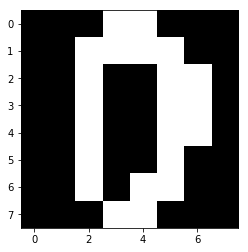

In [11]:
print(y[0:1])
plt.imshow(img.reshape((8,8)),cmap = 'gray')


** Step 4 Splitting Data into traning and testing **

In [12]:
from sklearn.cross_validation import train_test_split

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
x_train , x_test, y_train, y_test = train_test_split(X, y,
                                                     test_size = 0.2,
                                                    random_state = 0)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

### Step 5:  Building Machine Learning classifier or model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
model_log = LogisticRegression(C = 10.0)
model_knn = KNeighborsClassifier(n_neighbors=3)
model_svm = SVC(C = 10.0,probability=True) 
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier(n_estimators=100)

traning model

In [17]:
model_log.fit(x_train, y_train) # training model
model_knn.fit(x_train, y_train) # training model
model_svm.fit(x_train, y_train) # training model
model_dt.fit(x_train, y_train) # training model
model_rf.fit(x_train, y_train) # training model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Step -6 :Evaluation model**

In [18]:
y_pred_log = model_log.predict(x_test) # we use this for evaluation
y_pred_knn = model_knn.predict(x_test) # we use this for evaluation
y_pred_svm = model_svm.predict(x_test) # we use this for evaluation
y_pred_dt = model_dt.predict(x_test) # we use this for evaluation
y_pred_rf = model_rf.predict(x_test) # we use this for evaluation


***classification metrics**

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
cm_log = confusion_matrix(y_test, y_pred_log) # confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn) # confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm) # confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt) # confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf) # confusion matrix

cr_log = classification_report(y_test, y_pred_log) # classification report
cr_knn = classification_report(y_test, y_pred_knn) # classification report
cr_svm = classification_report(y_test, y_pred_svm) # classification report
cr_dt = classification_report(y_test, y_pred_dt) # classification report
cr_rf = classification_report(y_test, y_pred_rf) # classification report

In [21]:
import seaborn as sns

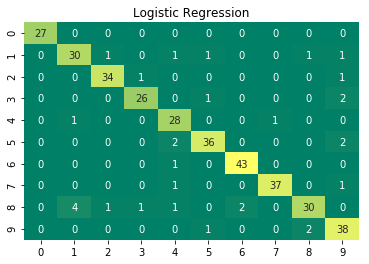

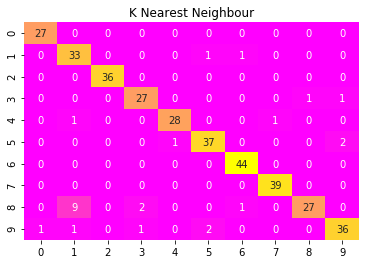

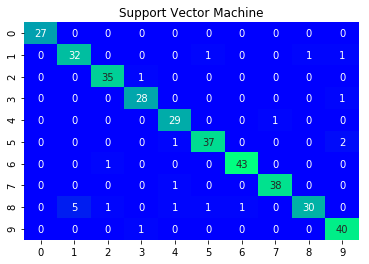

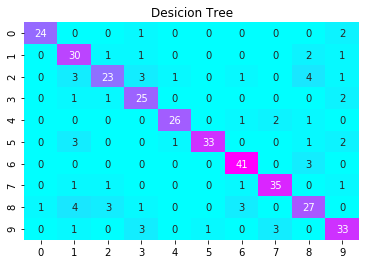

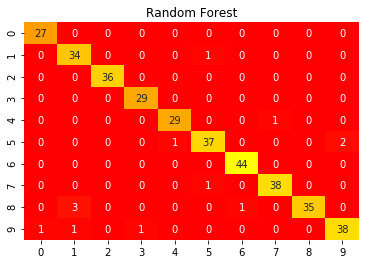

In [22]:
sns.heatmap(cm_log,annot=True,cbar=None,cmap = 'summer')
plt.title('Logistic Regression')
plt.show()
sns.heatmap(cm_knn,annot=True,cbar=None,cmap = 'spring')
plt.title('K Nearest Neighbour')
plt.show()
sns.heatmap(cm_svm,annot=True,cbar=None,cmap = 'winter')
plt.title('Support Vector Machine')
plt.show()
sns.heatmap(cm_dt,annot=True,cbar=None,cmap = 'cool')
plt.title('Desicion Tree')
plt.show()
sns.heatmap(cm_rf,annot=True,cbar=None,cmap = 'autumn')
plt.title('Random Forest')
plt.show()

In [23]:
print('='*20+'Logistic Regression'+'='*20)
print(cr_log)
print('='*20+'KNearest Neighbour'+'='*20)
print(cr_knn)
print('='*20+'Support Vector Machine'+'='*20)
print(cr_svm)
print('='*20+'Descion Tree'+'='*20)
print(cr_dt)
print('='*20+'Random Forest'+'='*20)
print(cr_rf)

====================Logistic Regression====================
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.86      0.86      0.86        35
          2       0.94      0.94      0.94        36
          3       0.93      0.90      0.91        29
          4       0.82      0.93      0.87        30
          5       0.92      0.90      0.91        40
          6       0.96      0.98      0.97        44
          7       0.97      0.95      0.96        39
          8       0.91      0.77      0.83        39
          9       0.84      0.93      0.88        41

avg / total       0.92      0.91      0.91       360

====================KNearest Neighbour====================
             precision    recall  f1-score   support

          0       0.96      1.00      0.98        27
          1       0.75      0.94      0.84        35
          2       1.00      1.00      1.00        36
          3       0.90      0

**Saving and loading model**

In [24]:
from sklearn.externals import joblib

In [25]:
joblib.dump(model_log,'number_rec_log.pkl')
joblib.dump(model_knn,'number_rec_knn.pkl')
joblib.dump(model_svm,'number_rec_svm.pkl')
joblib.dump(model_dt,'number_rec_dt.pkl')
joblib.dump(model_rf,'number_rec_rf.pkl')

['number_rec_rf.pkl']

In [26]:
classify = joblib.load('number_rec_rf.pkl')

**Tesing with new image**

In [27]:
import cv2

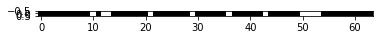

In [28]:
# Step 1 : Read image
img =cv2.imread('number2.jpg',0) # if you use zero it will convert into grayscale image
# step 2: Thresholding
ret, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
# step 3 : Resize image
img_re = cv2.resize(thresh,(8,8))
# Step 4: reshape it to row matrix
test = img_re.reshape((1,64))
# Step 5: Normalize
test = test/ test.max()
plt.imshow(test,cmap ='gray')
plt.show()

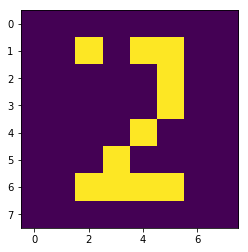

In [29]:
plt.imshow(img_re)

In [30]:
print('LogisticRegression',model_log.predict(test))
print('KNearest Neighbour', model_knn.predict(test))
print('Support Vector Machine', model_svm.predict(test))
print('Desicion Tree', model_dt.predict(test))
print('Random Forest',model_rf.predict(test))

LogisticRegression [2]
KNearest Neighbour [2]
Support Vector Machine [2]
Desicion Tree [2]
Random Forest [2]


# Real Time Number Detection

In [31]:
cap = cv2.VideoCapture(0)

while True:
    _,img = cap.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7,7),3)
    _,th3 = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)
    #th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,21,7)
    im2, contours, hierarchy = cv2.findContours(th3,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    ix = np.where(np.array(areas) > 300)[0]
    result = np.array([1,0,0,0,0,0,0,0,0,0])
    for i in ix:
        cnt = contours[i]
        xr,yr,wr,hr = cv2.boundingRect(cnt)
        if xr< 20 :
            xr = 25


        if yr < 20:
            yr = 25


        cv2.rectangle(img,(xr-10,yr-10),(xr+wr+10,yr+hr+10), (0,255,0),2)
        roi = th3[yr-20:yr+hr+20, xr-20:xr+wr+20]
        
        roi_re=cv2.resize(roi,(8,8))
        g = roi_re.reshape(1,64).astype('float32')
        g = g/255.0
        
        
        result=  model_rf.predict(g)
        #print(result)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,'Number: '+str(result),(xr-10,yr-10), font, 0.4, (255,0,0), 1, cv2.LINE_AA)


    cv2.imshow('Threshold',th3)
    cv2.imshow('orginal',img)

    if cv2.waitKey(41) & 0xff == ord('q'):
        break
        
    
    
cap.release()    
cv2.destroyAllWindows()